In [1]:

import pandas_datareader as Web
import datetime as dt


In [2]:
import pandas as pd
import numpy as np 
from sklearn import metrics 

import matplotlib.pyplot as plt

from keras.models import Sequential
from keras.layers import LSTM,Dropout,Dense
from sklearn.preprocessing import MinMaxScaler
import tensorflow as tf


In [3]:
#load dataset
start=dt.datetime(2019,1,1)
end=dt.datetime(2020,12,31)
ITC=Web.DataReader("ITC.NS",'yahoo',start,end)

In [4]:
ITC.head(10)


,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2019-01-01,283.549988,279.799988,282.200012,282.700012,2490548.0,250.739075
2019-01-02,283.250000,277.549988,282.250000,280.600006,9934187.0,248.876465
2019-01-03,282.450012,277.750000,280.600006,278.850006,6114946.0,247.324326
2019-01-04,282.950012,279.149994,279.149994,280.950012,7805148.0,249.186951
2019-01-07,285.250000,281.000000,284.299988,281.649994,9757529.0,249.807800
2019-01-08,285.500000,281.350006,282.000000,284.250000,7480522.0,252.113815
2019-01-09,291.700012,284.600006,285.600006,290.399994,12182118.0,257.568512
2019-01-10,293.700012,288.899994,290.750000,289.600006,10288580.0,256.858978
2019-01-11,296.000000,291.500000,291.899994,295.350006,16773035.0,261.958923


In [5]:
ITC.tail(10)

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2020-12-17,215.100006,211.250000,214.199997,213.050003,22386185.0,202.485748
2020-12-18,215.949997,209.750000,213.100006,214.500000,23775053.0,203.863846
2020-12-21,214.699997,199.149994,214.500000,202.949997,41834797.0,192.886551
2020-12-22,206.250000,196.899994,203.100006,203.399994,40986353.0,193.314240
2020-12-23,208.250000,202.000000,203.000000,207.750000,23695667.0,197.448547
2020-12-24,210.649994,205.600006,210.000000,208.600006,22768284.0,198.256409
2020-12-28,210.199997,207.850006,209.000000,209.500000,15741000.0,199.111771
2020-12-29,213.500000,210.100006,210.500000,211.550003,26546469.0,201.060120
2020-12-30,213.500000,209.550003,212.699997,211.149994,18925262.0,200.679947


In [6]:
ITC.shape

(492, 6)

In [7]:
ITC.describe()

,High,Low,Open,Close,Volume,Adj Close
count,492.000000,492.000000,492.000000,492.000000,4.920000e+02,492.000000
mean,233.248780,227.908028,230.964329,230.315549,2.067235e+07,209.486753
std,44.399622,44.820213,44.584724,44.539963,1.496775e+07,37.123760
min,152.000000,134.600006,148.000000,147.250000,2.490548e+06,133.104462
25%,195.137497,190.000000,192.450001,192.512505,9.967578e+06,178.572403
50%,239.775002,236.625000,238.150002,237.949997,1.647667e+07,215.091393
75%,276.674995,272.574997,274.612503,274.262497,2.559572e+07,244.738583
max,310.000000,306.149994,308.250000,307.200012,9.699491e+07,272.469177


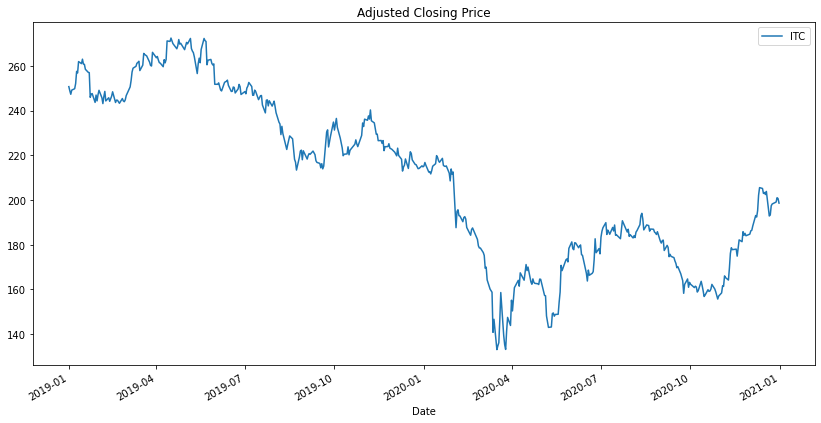

In [8]:
# analyising closing price from dataset

ITC['Adj Close'].plot(label='ITC',figsize=(14,7),title='Adjusted Closing Price')
plt.legend();

In [299]:
#Prepare data for checking Adj Close Price
scaler=MinMaxScaler(feature_range=(0,1))
scaled_data=scaler.fit_transform(ITC['Adj Close'].values.reshape(-1,1))

In [300]:
prediction_days= 90

In [301]:
x_train=[]
y_train=[]

In [302]:
for x in range(prediction_days,len(scaled_data)):
    x_train.append(scaled_data[x-prediction_days:x,0])
    y_train.append(scaled_data[x,0])

In [303]:
x_train,y_train=np.array(x_train),np.array(y_train)
x_train=np.reshape(x_train,(x_train.shape[0],x_train.shape[1],1))

In [304]:
#Build The Model

model=Sequential()
model.add(LSTM(units=50,return_sequences=True, input_shape=(x_train.shape[1],1)))
model.add(Dropout(0.2))
model.add(LSTM(units=50,return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(units=50))
model.add(Dropout(0.2))
model.add(Dense(units=1))#Prediction of the next closing price

In [305]:
model.compile(optimizer='adam',loss='mean_squared_error')

In [306]:
model.fit(x_train,y_train,epochs=1,batch_size=1,verbose=1)

402/402 [==============================] - 37s 73ms/step - loss: 0.0238


In [307]:
#test the model accuracy on the existing data



In [308]:
#load testdata
test_start=dt.datetime(2020,12,31)
test_end=dt.datetime(2021,1,12)

In [309]:
test_data=Web.DataReader("ITC.NS",'yahoo',test_start,test_end)

In [310]:
actual_price=test_data['Adj Close'].values

In [311]:
total_dataset=pd.concat((ITC['Adj Close'],test_data['Adj Close']),axis= 0)

In [312]:
model_inputs=total_dataset[len(total_dataset)-len(test_data)-prediction_days:].values
model_inputs=model_inputs.reshape(-1,1)
model_inputs=scaler.transform(model_inputs)

In [313]:
#MAke prediction
x_test=[]

for x in range(prediction_days,len(model_inputs)):
    x_test.append(model_inputs[x-prediction_days:x,0])

In [314]:
x_test=np.array(x_test)
x_test=np.reshape(x_test,(x_test.shape[0],x_test.shape[1],1))

In [315]:
predicted_prices=model.predict(x_test)
predicted_prices=scaler.inverse_transform(predicted_prices)

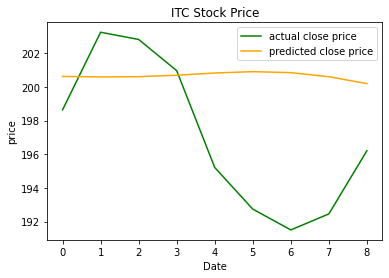

In [316]:
#plot the test prediction
plt.plot(actual_price,color='green',label="actual close price")
plt.plot(predicted_prices,color='orange',label="predicted close price")
plt.title("ITC Stock Price")
plt.xlabel("Date")
plt.ylabel("price")
plt.legend()
plt.show()

In [317]:
real_data=[model_inputs[len(model_inputs)+1-prediction_days:len(model_inputs+1),0]]
real_data=np.array(real_data)
real_data=np.reshape(real_data,(real_data.shape[0],real_data.shape[1],1))

In [318]:
prediction=model.predict(real_data)
prediction=scaler.inverse_transform(prediction)


In [319]:
print(f"Prediction Close Price:{prediction}")

Prediction Close Price:[[199.70499]]


# Here we are predicting the High Price for this dataset on 13/1/2021

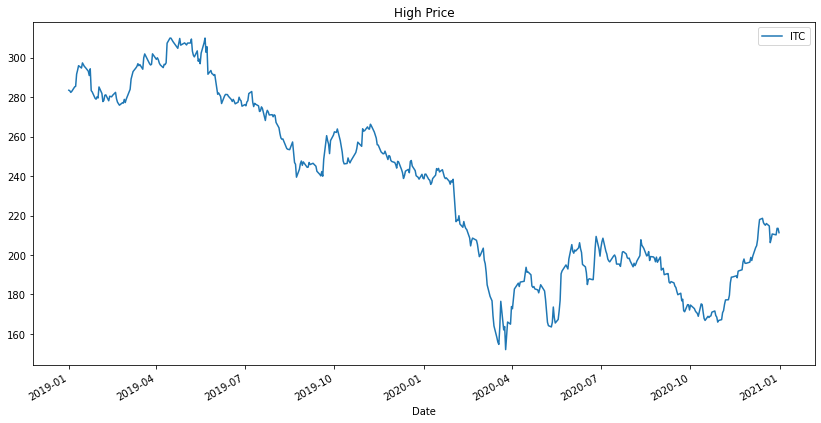

In [320]:
ITC['High'].plot(label='ITC',figsize=(14,7),title='High Price')
plt.legend();

In [341]:
#Prepare data for High Price
scaler=MinMaxScaler(feature_range=(0,1))
scaled_data=scaler.fit_transform(ITC['High'].values.reshape(-1,1))

In [342]:
prediction_days= 90

In [343]:
x_train=[]
y_train=[]

In [344]:
for x in range(prediction_days,len(scaled_data)):
    x_train.append(scaled_data[x-prediction_days:x,0])
    y_train.append(scaled_data[x,0])

In [345]:
x_train,y_train=np.array(x_train),np.array(y_train)
x_train=np.reshape(x_train,(x_train.shape[0],x_train.shape[1],1))

In [346]:
#Build The Model

model=Sequential()
model.add(LSTM(units=70,return_sequences=True, input_shape=(x_train.shape[1],1)))
model.add(Dropout(0.2))
model.add(LSTM(units=70,return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(units=70))
model.add(Dropout(0.2))
model.add(Dense(units=1))#Prediction of the next high price

In [347]:
model.compile(optimizer='adam',loss='mean_squared_error')

In [348]:
model.fit(x_train,y_train,epochs=14,batch_size=32,verbose=1)

Epoch 1/14
13/13 [==============================] - 17s 209ms/step - loss: 0.0952
Epoch 2/14
13/13 [==============================] - 2s 189ms/step - loss: 0.0131
Epoch 3/14
13/13 [==============================] - 3s 194ms/step - loss: 0.0109
Epoch 4/14
13/13 [==============================] - 3s 191ms/step - loss: 0.0082
Epoch 5/14
13/13 [==============================] - 3s 191ms/step - loss: 0.0086
Epoch 6/14
13/13 [==============================] - 3s 193ms/step - loss: 0.0077
Epoch 7/14
13/13 [==============================] - 2s 191ms/step - loss: 0.0074
Epoch 8/14
13/13 [==============================] - 3s 190ms/step - loss: 0.0064
Epoch 9/14
13/13 [==============================] - 2s 190ms/step - loss: 0.0067
Epoch 10/14
13/13 [==============================] - 3s 191ms/step - loss: 0.0055
Epoch 11/14
13/13 [==============================] - 3s 197ms/step - loss: 0.0050
Epoch 12/14
13/13 [==============================] - 3s 197ms/step - loss: 0.0057
Epoch 13/14
13/13 [=====

In [349]:
#load testdata
test_start=dt.datetime(2020,12,31)
test_end=dt.datetime(2021,1,12)

In [350]:
test_data=Web.DataReader("ITC.NS",'yahoo',test_start,test_end)

In [351]:
actual_price=test_data['High'].values

In [352]:
total_dataset=pd.concat((ITC['High'],test_data['High']),axis= 0)

In [353]:
model_inputs=total_dataset[len(total_dataset)-len(test_data)-prediction_days:].values
model_inputs=model_inputs.reshape(-1,1)
model_inputs=scaler.transform(model_inputs)

In [354]:
#MAke prediction
x_test=[]

for x in range(prediction_days,len(model_inputs)):
    x_test.append(model_inputs[x-prediction_days:x,0])

In [355]:
x_test=np.array(x_test)
x_test=np.reshape(x_test,(x_test.shape[0],x_test.shape[1],1))

In [356]:
predicted_prices=model.predict(x_test)
predicted_prices=scaler.inverse_transform(predicted_prices)

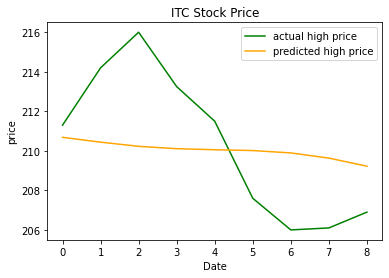

In [357]:
#plot the test prediction
plt.plot(actual_price,color='green',label="actual high price")
plt.plot(predicted_prices,color='orange',label="predicted high price")
plt.title("ITC Stock Price")
plt.xlabel("Date")
plt.ylabel("price")
plt.legend()
plt.show()

In [358]:
real_data=[model_inputs[len(model_inputs)+1-prediction_days:len(model_inputs+1),0]]
real_data=np.array(real_data)
real_data=np.reshape(real_data,(real_data.shape[0],real_data.shape[1],1))

In [359]:
prediction=model.predict(real_data)
prediction=scaler.inverse_transform(prediction)


In [360]:
print(f"High Price Prediction:{prediction}")

High Price Prediction:[[208.70578]]


# Now here we are trying to predict the Open Price of the stock for 13/01/2021

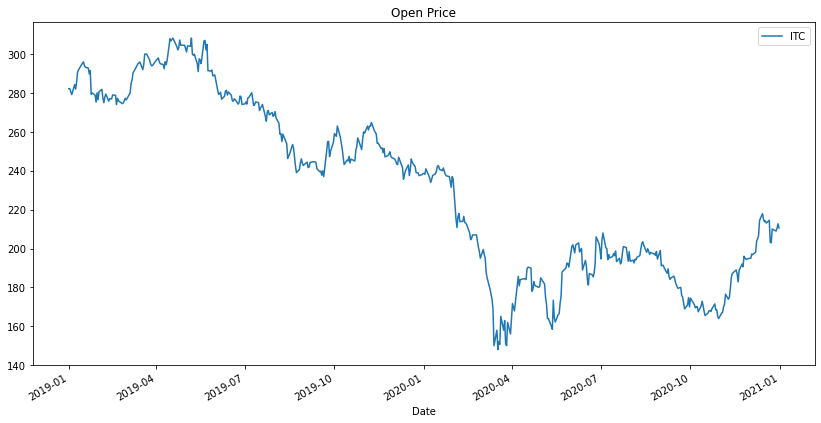

In [52]:
ITC['Open'].plot(label='ITC',figsize=(14,7),title='Open Price')
plt.legend();

In [361]:
scaler=MinMaxScaler(feature_range=(0,1))
scaled_data=scaler.fit_transform(ITC['Open'].values.reshape(-1,1))

In [362]:
prediction_days= 90

In [363]:
x_train=[]
y_train=[]
for x in range(prediction_days,len(scaled_data)):
    x_train.append(scaled_data[x-prediction_days:x,0])
    y_train.append(scaled_data[x,0])

In [364]:
x_train,y_train=np.array(x_train),np.array(y_train)
x_train=np.reshape(x_train,(x_train.shape[0],x_train.shape[1],1))

In [365]:
#Build The Model

model=Sequential()
model.add(LSTM(units=50,return_sequences=True, input_shape=(x_train.shape[1],1)))
model.add(Dropout(0.2))
model.add(LSTM(units=50,return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(units=50))
model.add(Dropout(0.2))
model.add(Dense(units=1))#Prediction of the next open price

In [366]:
model.compile(optimizer='adam',loss='mean_squared_error')

In [367]:
model.fit(x_train,y_train,epochs=25,batch_size=32)

Epoch 1/25
13/13 [==============================] - 12s 148ms/step - loss: 0.1354
Epoch 2/25
13/13 [==============================] - 2s 139ms/step - loss: 0.0225
Epoch 3/25
13/13 [==============================] - 2s 144ms/step - loss: 0.0128
Epoch 4/25
13/13 [==============================] - 2s 140ms/step - loss: 0.0078
Epoch 5/25
13/13 [==============================] - 2s 144ms/step - loss: 0.0087
Epoch 6/25
13/13 [==============================] - 2s 143ms/step - loss: 0.0078
Epoch 7/25
13/13 [==============================] - 2s 140ms/step - loss: 0.0072
Epoch 8/25
13/13 [==============================] - 2s 143ms/step - loss: 0.0072
Epoch 9/25
13/13 [==============================] - 2s 139ms/step - loss: 0.0067
Epoch 10/25
13/13 [==============================] - 2s 139ms/step - loss: 0.0070
Epoch 11/25
13/13 [==============================] - 2s 149ms/step - loss: 0.0066
Epoch 12/25
13/13 [==============================] - 2s 145ms/step - loss: 0.0066
Epoch 13/25
13/13 [=====

In [368]:
#load testdata
test_start=dt.datetime(2020,12,31)
test_end=dt.datetime(2021,1,12)

In [369]:
test_data=Web.DataReader("ITC.NS",'yahoo',test_start,test_end)

In [370]:
actual_price=test_data['Open'].values

In [371]:
total_dataset=pd.concat((ITC['Open'],test_data['Open']),axis= 0)

In [372]:
model_inputs=total_dataset[len(total_dataset)-len(test_data)-prediction_days:].values
model_inputs=model_inputs.reshape(-1,1)
model_inputs=scaler.transform(model_inputs)

In [373]:
#MAke prediction
x_test=[]

for x in range(prediction_days,len(model_inputs)):
    x_test.append(model_inputs[x-prediction_days:x,0])


In [374]:
x_test=np.array(x_test)
x_test=np.reshape(x_test,(x_test.shape[0],x_test.shape[1],1)) 

In [375]:
predicted_prices=model.predict(x_test)
predicted_prices=scaler.inverse_transform(predicted_prices)

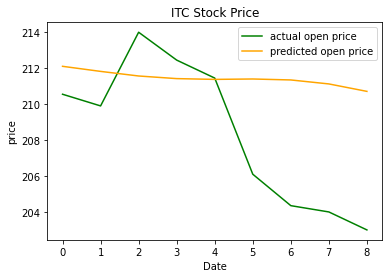

In [376]:
#plot the test prediction
plt.plot(actual_price,color='green',label="actual open price")
plt.plot(predicted_prices,color='orange',label="predicted open price")
plt.title("ITC Stock Price")
plt.xlabel("Date")
plt.ylabel("price")
plt.legend()
plt.show()

In [377]:

real_data=[model_inputs[len(model_inputs)+1-prediction_days:len(model_inputs+1),0]]
real_data=np.array(real_data)
real_data=np.reshape(real_data,(real_data.shape[0],real_data.shape[1],1))
prediction=model.predict(real_data)
prediction=scaler.inverse_transform(prediction)


In [378]:
print(f"Prediction Open Price:{prediction}")

Prediction Open Price:[[210.10478]]


# Now we are predicting the low Price for the 13/1/2021

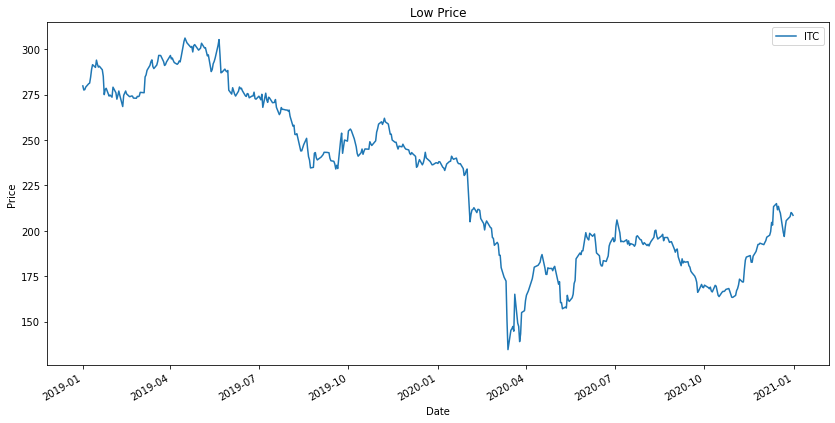

In [71]:
ITC['Low'].plot(label='ITC',figsize=(14,7),title='Low Price')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend();

In [72]:
scaler=MinMaxScaler(feature_range=(0,1))
scaled_data=scaler.fit_transform(ITC['Low'].values.reshape(-1,1))

In [73]:
prediction_days= 90

In [74]:
x_train=[]
y_train=[]
for x in range(prediction_days,len(scaled_data)):
    x_train.append(scaled_data[x-prediction_days:x,0])
    y_train.append(scaled_data[x,0])

In [75]:
x_train,y_train=np.array(x_train),np.array(y_train)
x_train=np.reshape(x_train,(x_train.shape[0],x_train.shape[1],1))

In [104]:
#Build The Model

model=Sequential()
model.add(LSTM(units=50,return_sequences=True, input_shape=(x_train.shape[1],1)))
model.add(Dropout(0.2))
model.add(LSTM(units=50,return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(units=50))
model.add(Dropout(0.2))
model.add(Dense(units=1))#Prediction of the next low price

In [105]:
model.compile(optimizer='adam',loss='mean_squared_error')

In [106]:
model.fit(x_train,y_train,epochs=25,batch_size=32,verbose=1)

Epoch 1/25
13/13 [==============================] - 9s 144ms/step - loss: 0.1366
Epoch 2/25
13/13 [==============================] - 2s 143ms/step - loss: 0.0220
Epoch 3/25
13/13 [==============================] - 2s 142ms/step - loss: 0.0121
Epoch 4/25
13/13 [==============================] - 2s 147ms/step - loss: 0.0090
Epoch 5/25
13/13 [==============================] - 2s 142ms/step - loss: 0.0070
Epoch 6/25
13/13 [==============================] - 2s 145ms/step - loss: 0.0074
Epoch 7/25
13/13 [==============================] - 2s 135ms/step - loss: 0.0066
Epoch 8/25
13/13 [==============================] - 2s 136ms/step - loss: 0.0083
Epoch 9/25
13/13 [==============================] - 2s 139ms/step - loss: 0.0071
Epoch 10/25
13/13 [==============================] - 2s 143ms/step - loss: 0.0077
Epoch 11/25
13/13 [==============================] - 2s 144ms/step - loss: 0.0066
Epoch 12/25
13/13 [==============================] - 2s 140ms/step - loss: 0.0075
Epoch 13/25
13/13 [======

In [107]:
#load testdata
test_start=dt.datetime(2020,12,31)
test_end=dt.datetime(2021,1,12)

In [108]:
test_data=Web.DataReader("ITC.NS",'yahoo',test_start,test_end)

In [109]:
actual_price=test_data['Low'].values

In [110]:
total_dataset=pd.concat((ITC['Low'],test_data['Low']),axis= 0)

In [111]:
model_inputs=total_dataset[len(total_dataset)-len(test_data)-prediction_days:].values
model_inputs=model_inputs.reshape(-1,1)
model_inputs=scaler.transform(model_inputs)

In [112]:
#MAke prediction
x_test=[]

for x in range(prediction_days,len(model_inputs)):
    x_test.append(model_inputs[x-prediction_days:x,0])


In [113]:
x_test=np.array(x_test)
x_test=np.reshape(x_test,(x_test.shape[0],x_test.shape[1],1)) 

In [114]:
predicted_prices=model.predict(x_test)
predicted_prices=scaler.inverse_transform(predicted_prices)

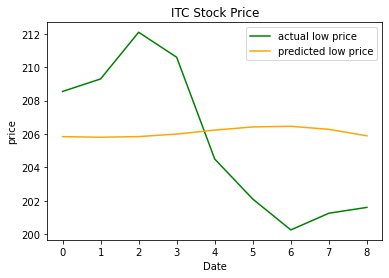

In [115]:
#plot the test prediction
plt.plot(actual_price,color='green',label="actual low price")
plt.plot(predicted_prices,color='orange',label="predicted low price")
plt.title("ITC Stock Price")
plt.xlabel("Date")
plt.ylabel("price")
plt.legend()
plt.show()

In [116]:
real_data=[model_inputs[len(model_inputs)+1-prediction_days:len(model_inputs+1),0]]
real_data=np.array(real_data)
real_data=np.reshape(real_data,(real_data.shape[0],real_data.shape[1],1))
prediction=model.predict(real_data)
prediction=scaler.inverse_transform(prediction)


In [117]:
print(f"Prediction Low Price:{prediction}")

Prediction Low Price:[[205.34033]]
